In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('kc_house_data.csv')

In [28]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
data = data.drop(['date', 'zipcode'], axis = 1)

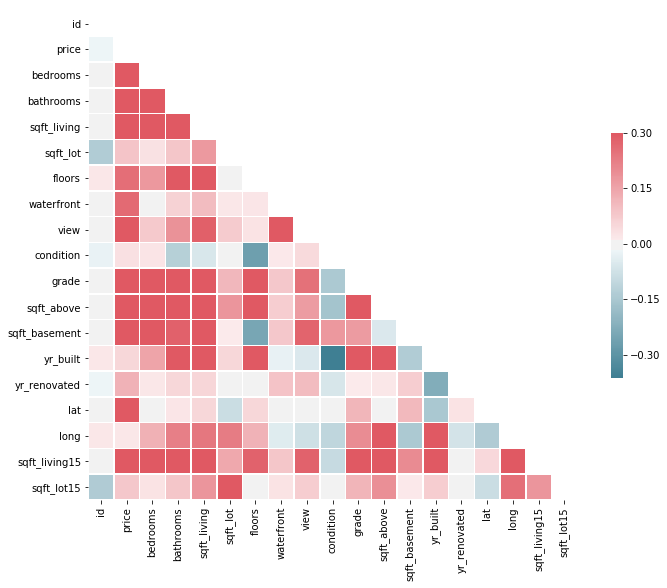

In [30]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 
'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 
'sqft_above', 'sqft_basement', 'condition', 'yr_built', 
'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

from sklearn.model_selection import train_test_split
X = data[features]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  #This line of code trains our model
y_pred = regressor.predict(X_test)  #This line of code predicts the price

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics 
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()

Mean Absolute Error: 125002.07442243419
Mean Squared Error: 43690646677.92254
Root Mean Squared Error: 209023.0769028208


,Actual,Predicted
17384,297000.0,3.872015e+05
722,1578000.0,1.502715e+06
2680,562100.0,5.274534e+05
18754,631500.0,5.779358e+05
14554,780000.0,9.993390e+05


Text(0,0.5,'Predicted prices')

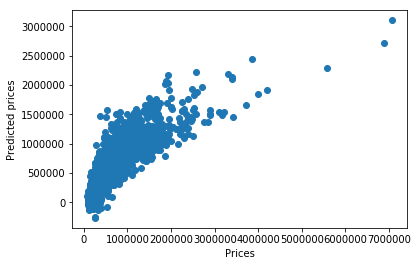

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [ ]:
# Advanced techniques to reduce root mean square

In [36]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score

#Implementation of LassoCV
# lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
# print("Root Mean Squared Error (Lasso): ", np.sqrt(-cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')).mean())


#Implementation of ElasticNet
# elastic = ElasticNet(alpha=0.001)
# print("Root Mean Squared Error (ElasticNet): ", np.sqrt(-cross_val_score(elastic, X, y, cv=10, scoring='neg_mean_squared_error')).mean())


#Implementation of RidgeCV
# ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
# print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')).mean())



Root Mean Squared Error (Xgboost):  122692.65863401273


Text(0.5,1,'xgboost')

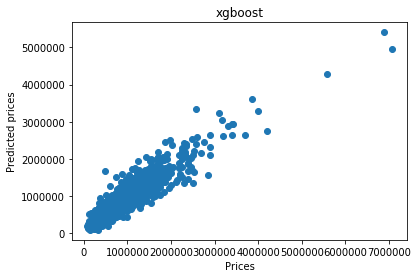

In [40]:
#Implementation of xgboost

import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.01, max_depth=4, min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Root Mean Squared Error (Xgboost): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("xgboost")


In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
17384,297000.0,2.918043e+05
722,1578000.0,1.695336e+06
2680,562100.0,5.116367e+05
18754,631500.0,5.994548e+05
14554,780000.0,6.963796e+05


In [ ]:
#  Prediction for first 5 elements

# Happy learning